In [0]:
from sklearn.neural_network import MLPClassifier
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import classification_report

from sklearn.model_selection import learning_curve

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

path = "/content/drive/My Drive/Sleep data"
filename_read = os.path.join(path, "All_data_patients_correct.csv")
patient_all = pd.read_csv(filename_read)
PAL = patient_all
print("All patients", PAL.head())
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
X_with_time = X.copy()
X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])
print("X data with time \n", X_with_time[0:5])


All patients     time         x         y         z  heartbeat  label
0    0.0  0.184021  0.679169 -0.476990       87.0     -1
1   30.0 -0.301010  0.805710  0.487167       95.0     -1
2   60.0 -0.323517  0.923447  0.146362       84.0     -1
3   90.0 -0.509674  0.855102 -0.049118       85.0     -1
4  120.0 -0.387756  0.919067  0.023758       82.0     -1
All patients shuffled
          time         x         y         z  heartbeat  label
4667    360.0  0.557373 -0.184052 -0.680679       65.0      0
9942   6390.0 -0.065735 -0.640915 -0.761108       54.0      2
6451  27240.0 -0.246597 -0.484222 -0.843368       49.0      2
8482   4170.0  0.372131 -0.870544  0.298874       59.0      3
1524  15210.0 -0.481674  0.414932 -0.767578       50.0      2
Patients data size (25781, 6)

Patients data normalized heartbeat
          time         x         y         z  heartbeat  label
4667    360.0  0.557373 -0.184052 -0.680679   0.269663      0
9942   6390.0 -0.065735 -0.640915 -0.761108   0.146067     

In [0]:
kf = KFold(15)

fold = 1

sc = StandardScaler()
tree = DecisionTreeClassifier(criterion = 'entropy')
Accuracy_train_list = []
Accuracy_test_list = []
Fold = []
for train_index, validate_index in kf.split(X,y):
    X_train = X[train_index]
    X_test= X[validate_index]
    y_train = y[train_index]
    y_test = y[validate_index]
    tree.fit(X_train,y_train)
    y_pred_test = tree.predict(X_test) #? y_test ipv x_test
    y_pred_train = tree.predict(X_train)
    Accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Accuracy decision tree Train", Accuracy_train, "%")
    Accuracy_test = accuracy_score(y_test,y_pred_test)
    print("Accuracy decision tree Test", Accuracy_test, "%") 
    print("Fold:", fold)
    Accuracy_train_list.append(Accuracy_train*100)
    Accuracy_test_list.append(Accuracy_test*100)
    Fold.append(fold)
    fold += 1

Accuracy decision tree Train 0.9999584406948716 %
Accuracy decision tree Test 0.7329842931937173 %
Fold: 1
Accuracy decision tree Train 0.9999584406948716 %
Accuracy decision tree Test 0.7643979057591623 %
Fold: 2
Accuracy decision tree Train 0.9999168813897432 %
Accuracy decision tree Test 0.743455497382199 %
Fold: 3
Accuracy decision tree Train 0.9999168813897432 %
Accuracy decision tree Test 0.7463641652123327 %
Fold: 4
Accuracy decision tree Train 0.9999168813897432 %
Accuracy decision tree Test 0.7382198952879581 %
Fold: 5
Accuracy decision tree Train 0.9999168813897432 %
Accuracy decision tree Test 0.7725421756835369 %
Fold: 6
Accuracy decision tree Train 0.9999168813897432 %
Accuracy decision tree Test 0.7527632344386271 %
Fold: 7
Accuracy decision tree Train 0.9999584406948716 %
Accuracy decision tree Test 0.7277486910994765 %
Fold: 8
Accuracy decision tree Train 0.9999584406948716 %
Accuracy decision tree Test 0.7422920302501455 %
Fold: 9
Accuracy decision tree Train 0.9999168

In [0]:
kf = KFold(15)

fold = 1

sc = StandardScaler()
tree = DecisionTreeClassifier(criterion = 'entropy')
Accuracy_train_list_time = []
Accuracy_test_list_time = []
Fold = []
for train_index, validate_index in kf.split(X_with_time,y):
    X_train = X_with_time[train_index]
    X_test= X_with_time[validate_index]
    y_train = y[train_index]
    y_test = y[validate_index]
    tree.fit(X_train,y_train)
    y_pred_test = tree.predict(X_test) #? y_test ipv x_test
    y_pred_train = tree.predict(X_train)
    Accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Accuracy decision tree Train", Accuracy_train, "%")
    Accuracy_test = accuracy_score(y_test,y_pred_test)
    print("Accuracy decision tree Test", Accuracy_test, "%") 
    print("Fold:", fold)
    Accuracy_train_list_time.append(Accuracy_train*100)
    Accuracy_test_list_time.append(Accuracy_test*100)
    Fold.append(fold)
    fold += 1

Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8179173938336242 %
Fold: 1
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8504944735311227 %
Fold: 2
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8371146015125073 %
Fold: 3
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8312972658522396 %
Fold: 4
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8260616637579988 %
Fold: 5
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.837696335078534 %
Fold: 6
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8307155322862129 %
Fold: 7
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8435136707388017 %
Fold: 8
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.820826061663758 %
Fold: 9
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8423502036067481 %
Fold: 10
Accuracy decision tree Train 1.0 %
Accuracy decision tree Test 0.8429319371727748

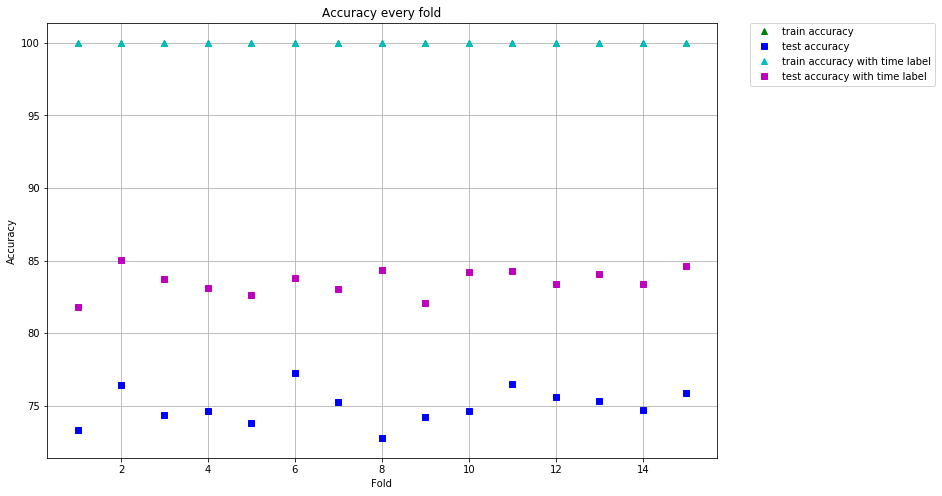

In [0]:
fig = plt.figure(figsize=(12,8))
plt.plot(Fold,Accuracy_train_list,'g^',label = "train accuracy")
plt.plot(Fold, Accuracy_test_list, 'bs', label = "test accuracy")
plt.plot(Fold,Accuracy_train_list_time, 'c^', label = "train accuracy with time label")
plt.plot(Fold, Accuracy_test_list_time, 'ms', label = "test accuracy with time label")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy every fold")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()